# Sorting

**Table of contents**<a id='toc0_'></a>    
- 1. [Bubble sort](#toc1_)    
- 2. [Insertion sort](#toc2_)    
- 3. [Quick sort](#toc3_)    
  - 3.1. [Partition](#toc3_1_)    
  - 3.2. [Implementing quicksort](#toc3_2_)    
- 4. [Advanced: Comparision of performance](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [24]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
import time

**Links to further material:**  
If you feel inspired by the material here, you can try your hand at solving algorithmic challenges at [Project Euler](https://projecteuler.net).  
(there are both easy and harder exercises to choose from) 

Sorting is a super central task of computing. IBM invented it's first computers in the 30s to sort data. 

Would be hard to keep track of data without sorting. Thus, many algorithms have been developed for this purpose. 

We will look at a simple algorithm first, the bubble sort, which relies on swapping elements iteratively. 

Function for **swapping** element `L[i]` with element `L[j]` in-place:

In [25]:
def swap(L,i,j):
    temp = L[i] # save value in place holder variable
    L[i] = L[j] # overwrite value at i with value at j
    L[j] = temp # write original value at i to value at j

**Example:**

In [26]:
L = [1, 3, 4, 9, 13] 
swap(L,i=0,j=1)
print('after swap',L)

after swap [3, 1, 4, 9, 13]


## 1. <a id='toc1_'></a>[Bubble sort](#toc0_)

**Problem:** Sort a list of numbers in-place.

**Inputs:** List of numbers.

**Outputs:** None.

**Algorithm:** `bubble_sort()`

  1. Loop through the first n-1 elements in list, swap with next element if current is larger.
  2. Loop through the first n-2 elements in list, swap with next element if current is larger.
  <br>
  ...
  <br>
  4. Loop through the first 3 elements in list, swap with next element if current is larger.
  5. Swap the two first elements if the first is larger than the second
  6. List is sorted
  

In [43]:
L = [54, 26, 93, 17, 77, 31, 44, 55, 20] # test list       

def bubble_sort(L):
    n = len(L)

    for k in range(n-1, 0, -1):
        for i in range(k):
            if L[i]>L[i+1]:
                swap(L,i,i+1)

bubble_sort(L)
print(L)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


In [28]:
def bubble_sort(L):
    """ bubble sort
    
    Args:
    
        L (list): List of numbers
        
    """
    
    # k starts being len(L)-1 and is decreased by 1 until hitting 0
    for k in range(len(L)-1,0,-1):
        for i in range(k):
            if L[i] > L[i+1]:
                swap(L,i,i+1)
    
L = [54, 26, 93, 17, 77, 31, 44, 55, 20]
bubble_sort(L)
print('sorted L:',L)

sorted L: [17, 20, 26, 31, 44, 54, 55, 77, 93]


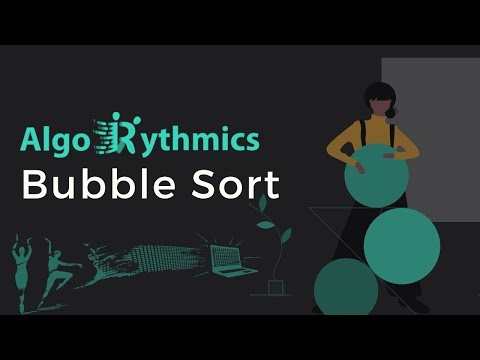

In [29]:
from IPython.display import YouTubeVideo
YouTubeVideo('lyZQPjUT5B4', width=800, height=600, start=45)

**Another visualization of bubble sort**  
![bubble](https://upload.wikimedia.org/wikipedia/commons/5/54/Sorting_bubblesort_anim.gif)

**Illustration with printout:**

In [30]:
def bubble_sort_with_print(L):
    for k in range(len(L)-1,0,-1):
        print(f'step = {len(L)-k}')
        for i in range(k):
            if L[i] > L[i+1]:
                swap(L,i,i+1)
            print(L)                
        print('')
        
L = [54, 26, 93, 17, 77, 31, 44, 55, 20]        
print('original',L,'\n')
bubble_sort_with_print(L)

original [54, 26, 93, 17, 77, 31, 44, 55, 20] 

step = 1
[26, 54, 93, 17, 77, 31, 44, 55, 20]
[26, 54, 93, 17, 77, 31, 44, 55, 20]
[26, 54, 17, 93, 77, 31, 44, 55, 20]
[26, 54, 17, 77, 93, 31, 44, 55, 20]
[26, 54, 17, 77, 31, 93, 44, 55, 20]
[26, 54, 17, 77, 31, 44, 93, 55, 20]
[26, 54, 17, 77, 31, 44, 55, 93, 20]
[26, 54, 17, 77, 31, 44, 55, 20, 93]

step = 2
[26, 54, 17, 77, 31, 44, 55, 20, 93]
[26, 17, 54, 77, 31, 44, 55, 20, 93]
[26, 17, 54, 77, 31, 44, 55, 20, 93]
[26, 17, 54, 31, 77, 44, 55, 20, 93]
[26, 17, 54, 31, 44, 77, 55, 20, 93]
[26, 17, 54, 31, 44, 55, 77, 20, 93]
[26, 17, 54, 31, 44, 55, 20, 77, 93]

step = 3
[17, 26, 54, 31, 44, 55, 20, 77, 93]
[17, 26, 54, 31, 44, 55, 20, 77, 93]
[17, 26, 31, 54, 44, 55, 20, 77, 93]
[17, 26, 31, 44, 54, 55, 20, 77, 93]
[17, 26, 31, 44, 54, 55, 20, 77, 93]
[17, 26, 31, 44, 54, 20, 55, 77, 93]

step = 4
[17, 26, 31, 44, 54, 20, 55, 77, 93]
[17, 26, 31, 44, 54, 20, 55, 77, 93]
[17, 26, 31, 44, 54, 20, 55, 77, 93]
[17, 26, 31, 44, 54, 20, 

## 2. <a id='toc2_'></a>[Insertion sort](#toc0_)

**Algorithm:** `insertion_sort()`

  1. Consider the *second* element. Insert it correctly in the list of the numbers before the *second* element.
  2. Consider the *third*  element. Insert it correctly in the list of the numbers before the *third* element.
  <br>
  ...
  <br>
  4. Consider the n'th element. Insert it correctly in the list of the numbers before the *n'th* element.
  5. List is sorted
  

**Illustration:**

<img src="insertionsort.png" alt="insertionsort" width=50% />

In [44]:
L = [54, 26, 93, 17, 77, 31, 44, 55, 20] # test list

def insertion_sort(L):
    n = len(L)

    for k in range(1, n):
        val = L[k]
        i = k
        while i>0 and val<L[i-1]:
            L[i] = L[i-1]
            i -= 1
        L[i] = val

insertion_sort(L)
print(L)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


In [32]:
def insertion_sort(L):
    """ insertion sort
    
    Args:
    
        L (list): List of numbers
        
    """
    
    # loop over last n-1 elements, skipping the 1st element (see range func).  
    n = len(L)
    for k in range(1,n): 
        
        # a. current value and position
        x = L[k]
        i = k
        
        # b. move left while larger: a bubble sort at heart
        while i > 0 and L[i-1] > x:         
            L[i] = L[i-1] # move
            i = i-1
        
        # c. insert current value
        L[i] = x

L = [54, 26, 93, 17, 77, 31, 44, 55, 20]
insertion_sort(L)
print('sorted',L)

sorted [17, 20, 26, 31, 44, 54, 55, 77, 93]


**Benefits relative to bubble sort:**

1. Moves instead of swaps, 1 operation less.
2. Data is often **partially sorted** to begin with. Insertion sort benefits from that.

## 3. <a id='toc3_'></a>[Quick sort](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Partition](#toc0_)

*Intermezzo: Solving the partition problem is useful for a so-called quicksort.*

**Problem:** Permute a list and return a splitpoint such that all elements before the point is smaller than or equal to the first element in the original list, and all elements afterwards are strictly larger.

**Input:** List of numbers.

**Output:** Integer.

**Algorithm:**

0. Let splitting point be first element of list.
1. From the *left* find the first element larger than split point (leftmark).
2. From the *right* find the first element smaller than the split point (rightmark).
3. Swap these two elements.
4. Repeat 1-3 starting from previous leftmark and rightmark. Continue until leftmark is larger than rightmark.
5. Swap first and rightmark element.
6. Return the rightmark.

<img src="quicksort.png" alt="quicksort" width=60% />

In [33]:
def partition(L,first,last):
    """ partition
    
    Permute a list and return a splitpoint, such that all elements before 
    is larger than or equal to the first element in the original list, 
    and all elements afterwards are strictly larger.
    
    Args:
    
        L (list): List of numbers
        first (integer): Startpoint
        last (integer): Endpoint
    
    Returns:
    
        splitpoint (integer): 
        
    """
    
    # a. initialize
    splitvalue = L[first]
    leftmark = first+1
    rightmark = last

    # b. find splitpoint
    done = False
    while not done:

        # i. find leftmark
        while leftmark <= rightmark and L[leftmark] <= splitvalue :
            leftmark = leftmark + 1
        
        # i. find rightmark
        while rightmark >= leftmark and L[rightmark] >= splitvalue:
            rightmark = rightmark -1

        # iii. check if done or swap left and right
        if rightmark < leftmark:
            done = True
        else:
            swap(L,leftmark,rightmark)

    # c. final swap
    swap(L,first,rightmark)

    return rightmark


In [34]:
L = [54, 26, 93, 17, 77, 31, 44, 55, 20]
print('before',L)
splitpoint = partition(L,0,len(L)-1)
print('after',L)
print('split',L[:splitpoint+1],L[splitpoint+1:])

before [54, 26, 93, 17, 77, 31, 44, 55, 20]
after [31, 26, 20, 17, 44, 54, 77, 55, 93]
split [31, 26, 20, 17, 44, 54] [77, 55, 93]


### 3.2. <a id='toc3_2_'></a>[Implementing quicksort](#toc0_)

**Algorithm:** `quick_sort()`

1. Recursively partition the list and the sub-lists when splitting at the splitpoint.
2. The list is now sorted.

In [35]:
def quick_sort(L):
    _quick_sort(L,0,len(L)-1)

def _quick_sort(L,first,last):
   
    if first < last:

        splitpoint = partition(L,first,last)    
        _quick_sort(L,first,splitpoint-1) # left part
        _quick_sort(L,splitpoint+1,last) # right part

In [36]:
L = [54, 26, 93, 17, 77, 31, 44, 55, 20]
quick_sort(L)
print('sorted',L)

sorted [17, 20, 26, 31, 44, 54, 55, 77, 93]


**Visualization of quicksort**  
![quicksort](https://upload.wikimedia.org/wikipedia/commons/6/6a/Sorting_quicksort_anim.gif)

If you want to learn even more about sorting algorithms you can start [here](https://runestone.academy/ns/books/published/pythonds/SortSearch/TheQuickSort.html)

In the advanced section we'll compare performance of the different methods. <br>
Spoiler: The functions and methods already implemented in official packages are hard to beat.

## 4. <a id='toc4_'></a>[Advanced: Comparision of performance](#toc0_)

Lets us compare the different sorting algorithm:

1. Bubble
2. Insertion
3. Quick
4. Quick (as implemented in Numpy)

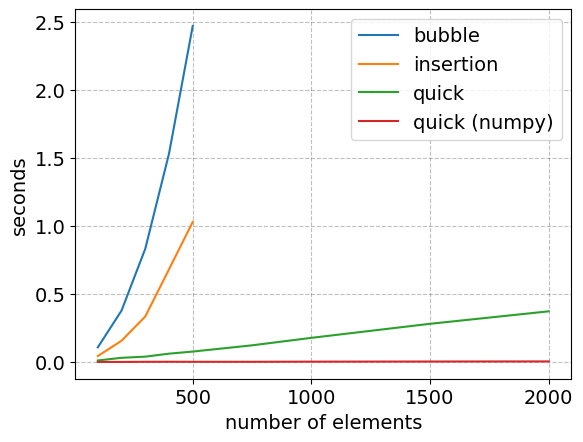

In [37]:
# a. settings
n_vec = np.array([100,200,300,400,500,750,1000,1500,2000,4000,8000,16000]) # number of elements in list
K = 50 # number of repetitions when timing

# b. allocate vectors for results
bubble = np.empty(len(n_vec))
insertion = np.empty(len(n_vec))
quick = np.empty(len(n_vec))
quicknp = np.empty(len(n_vec))

# c. run time trials
np.random.seed(1999)
for i,n in enumerate(n_vec):
    
    # i. draw K random lists of lenght n
    L_bubble = []
    L_insertion = []
    L_quick = []
    L_quicknp = []
    for k in range(K):
        L = np.random.uniform(size=n)
        np.random.shuffle(L)
        L_bubble.append(L.copy())
        L_insertion.append(L.copy())
        L_quick.append(L.copy())
        L_quicknp.append(L.copy())
        
    # ii. bubble sort
    if n <= 500:
        t0 = time.time() # start timer
        for k in range(K):
            bubble_sort(L_bubble[k])
        bubble[i] = time.time()-t0 # calculate time since start
    else: 
        bubble[i] = np.nan
        
    # ii. insertion sort
    if n <= 500:
        t0 = time.time()
        for k in range(K):
            insertion_sort(L_insertion[k])
        insertion[i] = time.time()-t0
    else: 
        insertion[i] = np.nan
        
    # iii. quicksort
    if n <= 2000:
        t0 = time.time()
        for k in range(K):
            quick_sort(L_quick[k])
        quick[i] = time.time()-t0
    else: 
        quick[i] = np.nan
        
    # iii. quicksort (numpy implementation)    
    t0 = time.time()
    for k in range(K):
        L_quicknp[k].sort() # built-in numpy method
    quicknp[i] = time.time()-t0
    
    # iv. check that all sorted lists are the same
    for k in range(K):
        if n <= 500:
            assert np.all(L_bubble[k] == L_quick[k])
            assert np.all(L_insertion[k] == L_quick[k])
        if n <= 2000:
            assert np.all(L_quicknp[k] == L_quick[k])
    
# d. figure    
I = n_vec <= 2000
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(n_vec[I],bubble[I],label='bubble')
ax.plot(n_vec[I],insertion[I],label='insertion')
ax.plot(n_vec[I],quick[I],label='quick')
ax.plot(n_vec[I],quicknp[I],label='quick (numpy)')
ax.set_xlabel('number of elements')
ax.set_ylabel('seconds')
ax.legend(facecolor='white',frameon=True);

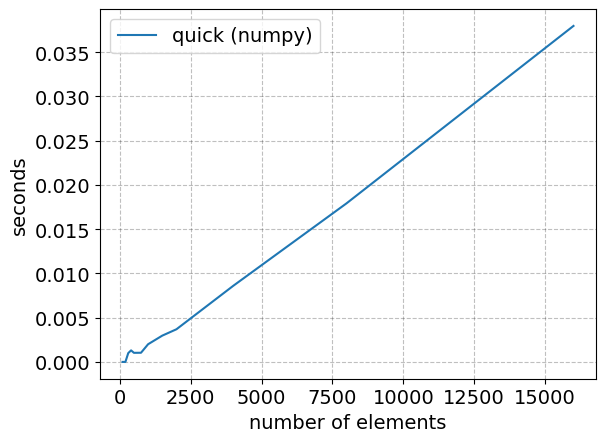

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(n_vec,quicknp,label='quick (numpy)')
ax.set_xlabel('number of elements')
ax.set_ylabel('seconds')
ax.legend(facecolor='white',frameon=True);

**Take-aways:** 

1. Complexity matters
2. Implementation matter (and the built-in functions and methods are hard to beat)